In [1]:
class Mision:
    def __init__(self, descripcion, condicion):
        self.descripcion = descripcion
        self.condicion = condicion

    def esta_completa(self, jugador, tablero):
        return self.condicion(jugador, tablero)

def generar_mision_conquista(continente):
    def mision_conquistar_continente(jugador, tablero):
        paises_continente = [pais for pais in tablero.paises.values() if pais.continente == continente]
        return all(pais.jugador == jugador for pais in paises_continente)
    return Mision(f"Conquistar todo el continente de {continente}", mision_conquistar_continente)

continentes = ['América del Norte', 'América del Sur', 'Europa', 'África', 'Asia', 'Oceanía']
misiones = [generar_mision_conquista(continente) for continente in continentes]

In [2]:
import networkx as nx

def construir_grafo(tablero):
    G = nx.Graph()
    for nombre_pais, pais in tablero.paises.items():
        G.add_node(nombre_pais, tropas=pais.tropas, jugador=pais.jugador.nombre)
        for vecino in pais.vecinos:
            G.add_edge(nombre_pais, vecino)
    return G

In [3]:
def actualizar_grafo(G, tablero):
    for nombre_pais, pais in tablero.paises.items():
        G.nodes[nombre_pais]['tropas'] = pais.tropas
        G.nodes[nombre_pais]['jugador'] = pais.jugador.nombre

import matplotlib.pyplot as plt

def dibujar_grafo(G):
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()

In [22]:
import random
import numpy as np
class Pais:
    def __init__(self, nombre, continente,vecinos):
        self.nombre = nombre
        self.continente = continente
        self.jugador = None
        self.tropas = 0
        self.vecinos = vecinos

    def __str__(self):
        return f"{self.nombre} - Continente: {self.continente}, Jugador: {self.jugador}, Tropas: {self.tropas}   Vecinos  :  {self.vecinos}"

class Tablero:
    def __init__(self, jugadores):
        self.jugadores = jugadores
        self.turno = 0
        self.paises = self.generar_paises()
        self.asignar_paises_a_jugadores()
        self.grafo = construir_grafo(self)

    def generar_paises(self):
      paises = {
                'Alaska': Pais('Alaska', 'América del Norte', ['Territorios del Noroeste', 'Kamchatka']),
                'Territorios del Noroeste': Pais('Territorios del Noroeste', 'América del Norte', ['Alaska', 'Alberta', 'Ontario', 'Groenlandia']),
                'Groenlandia': Pais('Groenlandia', 'América del Norte', ['Territorios del Noroeste', 'Ontario', 'Quebec', 'Islandia']),
                'Estados Unidos': Pais('Estados Unidos', 'América del Norte', ['Alberta', 'Ontario', 'Quebec']),
                'Alberta': Pais('Alberta', 'América del Norte', ['Territorios del Noroeste', 'Ontario', 'Estados Unidos']),
                'Ontario': Pais('Ontario', 'América del Norte', ['Territorios del Noroeste', 'Alberta', 'Groenlandia', 'Quebec', 'Estados Unidos']),
                'Quebec': Pais('Quebec', 'América del Norte', ['Ontario', 'Groenlandia', 'Estados Unidos']),
                'Venezuela': Pais('Venezuela', 'América del Sur', ['Perú', 'Brasil']),
                'Perú': Pais('Perú', 'América del Sur', ['Venezuela', 'Brasil', 'Argentina']),
                'Argentina': Pais('Argentina', 'América del Sur', ['Perú', 'Brasil']),
                'Brasil': Pais('Brasil', 'América del Sur', ['Venezuela', 'Perú', 'Argentina', 'África del Sur']),
                'Islandia': Pais('Islandia', 'Europa', ['Groenlandia', 'Gran Bretaña', 'Escandinavia']),
                'Gran Bretaña': Pais('Gran Bretaña', 'Europa', ['Islandia', 'Escandinavia', 'Europa Occidental']),
                'Escandinavia': Pais('Escandinavia', 'Europa', ['Islandia', 'Gran Bretaña', 'Europa Septentrional', 'Ucrania']),
                'Europa Occidental': Pais('Europa Occidental', 'Europa', ['Gran Bretaña', 'Europa Septentrional', 'Europa del Sur', 'África del Norte']),
                'Europa Septentrional': Pais('Europa Septentrional', 'Europa', ['Escandinavia', 'Europa Occidental', 'Europa del Sur', 'Ucrania']),
                'Ucrania': Pais('Ucrania', 'Europa', ['Escandinavia', 'Europa Septentrional', 'Europa del Sur', 'África del Norte', 'África Oriental', 'Medio Oriente']),
                'Europa del Sur': Pais('Europa del Sur', 'Europa', ['Europa Occidental', 'Europa Septentrional', 'Ucrania', 'África del Norte', 'Medio Oriente']),
                'África del Norte': Pais('África del Norte', 'África', ['Europa Occidental', 'Ucrania', 'Europa del Sur', 'África Oriental', 'Egipto', 'Brasil']),
                'Egipto': Pais('Egipto', 'África', ['África del Norte', 'África Oriental', 'Congo', 'Europa del Sur', 'Medio Oriente']),
                'Congo': Pais('Congo', 'África', ['África del Norte', 'África Oriental', 'África del Sur']),
                'África Oriental': Pais('África Oriental', 'África', ['Congo', 'Egipto', 'África del Norte', 'Madagascar', 'África del Sur', 'Ucrania']),
                'Madagascar': Pais('Madagascar', 'África', ['África Oriental', 'África del Sur']),
                'África del Sur': Pais('África del Sur', 'África', ['Congo', 'África Oriental', 'Madagascar', 'Brasil']),
                'Ural': Pais('Ural', 'Asia', ['Escandinavia', 'Siberia', 'China', 'Ucrania']),
                'Siberia': Pais('Siberia', 'Asia', ['Ural', 'China', 'Mongolia', 'Irkutsk', 'Yakutsk']),
                'Yakutsk': Pais('Yakutsk', 'Asia', ['Siberia', 'Kamchatka', 'Irkutsk']),
                'Kamchatka': Pais('Kamchatka', 'Asia', ['Yakutsk', 'Siberia', 'Alaska', 'Japón']),
                'Irkutsk': Pais('Irkutsk', 'Asia', ['Siberia', 'Mongolia', 'Yakutsk', 'Kamchatka']),
                'Mongolia': Pais('Mongolia', 'Asia', ['Siberia', 'China', 'Irkutsk', 'Japón']),
                'Japón': Pais('Japón', 'Asia', ['Mongolia', 'Kamchatka']),
                'Afganistán': Pais('Afganistán', 'Asia', ['Ucrania', 'China', 'India', 'Medio Oriente']),
                'China': Pais('China', 'Asia', ['Ural', 'Siberia', 'Mongolia', 'India', 'Siam', 'Afganistán']),
                'Medio Oriente': Pais('Medio Oriente', 'Asia', ['Ucrania', 'Egipto', 'África del Norte', 'India', 'Siam', 'Afganistán']),
                'India': Pais('India', 'Asia', ['Afganistán', 'Medio Oriente', 'China', 'Siam']),
                'Siam': Pais('Siam', 'Asia', ['China', 'India', 'Indonesia']),
                'Indonesia': Pais('Indonesia', 'Oceanía', ['Siam', 'Nueva Guinea', 'Australia Occidental']),
                'Nueva Guinea': Pais('Nueva Guinea', 'Oceanía', ['Indonesia', 'Australia Occidental', 'Australia Oriental']),
                'Australia Occidental': Pais('Australia Occidental', 'Oceanía', ['Indonesia', 'Nueva Guinea', 'Australia Oriental']),
                'Australia Oriental': Pais('Australia Oriental', 'Oceanía', ['Nueva Guinea', 'Australia Occidental']),
            }
        # La lógica de generación de países se mantiene igual.
      return paises

    def asignar_paises_a_jugadores(self):
        # La lógica de asignación de países a jugadores se mantiene igual.
        nombres_paises = list(self.paises.keys())
        random.shuffle(nombres_paises)
        for i, nombre_pais in enumerate(nombres_paises):
            pais = self.paises[nombre_pais]
            jugador = self.jugadores[i % len(self.jugadores)]
            pais.jugador = jugador  # Aquí está la corrección
            jugador.paises.append(pais)
            if pais.tropas <= 0:
               pais.tropas = 1


    def distancia_minima(self, distancias, visitados):
        minima_distancia = float('inf')
        pais_minima_distancia = None
        for pais, distancia in distancias.items():
            if distancia < minima_distancia and pais not in visitados:
                minima_distancia = distancia
                pais_minima_distancia = pais
        return pais_minima_distancia


    def lanzar_dados(self, num_dados):
        return sorted([random.randint(1, 6) for _ in range(num_dados)], reverse=True)

    def batalla(self, pais_origen, pais_destino):
        dados_atacante = self.lanzar_dados(min(3, pais_origen.tropas - 1))
        dados_defensor = self.lanzar_dados(min(2, pais_destino.tropas))

        print(f"{pais_origen.jugador.nombre} lanza {dados_atacante}")
        print(f"{pais_destino.jugador.nombre} lanza {dados_defensor}")

        for dado_atacante, dado_defensor in zip(dados_atacante, dados_defensor):
            if dado_atacante > dado_defensor:
                pais_destino.tropas -= 1
                print(f"{pais_destino.jugador.nombre} pierde una tropa en {pais_destino.nombre}")
            else:
                pais_origen.tropas -= 1
                print(f"{pais_origen.jugador.nombre} pierde una tropa en {pais_origen.nombre}")

        if pais_destino.tropas == 0:
            pais_destino.jugador.paises.remove(pais_destino)
            pais_destino.jugador = pais_origen.jugador
            pais_destino.jugador.paises.append(pais_destino)
            pais_destino.tropas = 1
            pais_origen.tropas -= 1
            print(f"{pais_origen.jugador.nombre} ha conquistado {pais_destino.nombre}")
        if pais_origen.tropas < 0:
          raise ValueError(f"El país {pais_origen.nombre} tiene un número negativo de tropas: {pais_origen.tropas}")
        if pais_destino.tropas < 0:
          raise ValueError(f"El país {pais_destino.nombre} tiene un número negativo de tropas: {pais_destino.tropas}")



######################################################## mover tropas.

    def mover_tropas(self, nombre_pais_origen, nombre_pais_destino, numero_tropas):
        # Para mover tropas, ambos países deben ser propiedad del mismo jugador y deben ser vecinos.
        pais_origen = self.paises[nombre_pais_origen]
        pais_destino = self.paises[nombre_pais_destino]
        if self.paises[nombre_pais_origen].tropas <= 1:
          print(f"{nombre_pais_origen} no tiene suficientes tropas para mover.")
          return
        if pais_destino.nombre not in pais_origen.vecinos:
            raise ValueError(f"No puedes mover tropas a {nombre_pais_destino} desde {nombre_pais_origen} porque no son vecinos.")
        if pais_origen.jugador != pais_destino.jugador:
            raise ValueError("Solo puedes mover tropas entre tus propios territorios.")
        if numero_tropas >= pais_origen.tropas:
            raise ValueError("Siempre debes dejar al menos una tropa en cada país.")
        pais_origen.tropas -= numero_tropas
        pais_destino.tropas += numero_tropas


######################################################################################################
#REFORZAR
    def es_frontera(self, pais):
        return any(self.paises[vecino].jugador != pais.jugador for vecino in pais.vecinos)


    # Primero, debemos agregar una verificación para garantizar que todas las tropas sean un número positivo.
    # Si encontramos un país con un número negativo de tropas, lanzaremos un error.

    def verificar_tropas(tablero):
        for pais in tablero.paises.values():
            if pais.tropas < 0:
                raise ValueError(f"El país {pais.nombre} tiene un número negativo de tropas: {pais.tropas}")

    # Luego, usamos esta función en la construcción del grafo.

    def construir_grafo_con_peso(self):
        self.verificar_tropas()
        G = nx.Graph()
        for nombre_pais, pais in self.paises.items():
            G.add_node(nombre_pais, tropas=pais.tropas, jugador=pais.jugador.nombre)
            for vecino in pais.vecinos:
                peso = self.paises[vecino].tropas
                G.add_edge(nombre_pais, vecino, weight=peso)
        return G

    # Finalmente, usamos la función de construcción del grafo modificada en la función calcular_pesos.

    def calcular_pesos(self, jugador, paises_a_reforzar):
        G = self.construir_grafo_con_peso()
        pesos = {}
        for pais in paises_a_reforzar:
            distancias = nx.single_source_dijkstra_path_length(G, pais.nombre, weight='weight')
            peso_total = sum(distancias.values())
            pesos[pais] = peso_total  # aquí estamos usando el objeto pais en lugar de su nombre
        return pesos



    def siguiente_turno(self):
        self.turno = (self.turno + 1) % len(self.jugadores)

    def verificar_ganador(self):
        # Si todos los países son propiedad de un mismo jugador, ese jugador ha ganado.
        propietario_pais_inicial = list(self.paises.values())[0].propietario
        for pais in self.paises.values():
            if pais.propietario != propietario_pais_inicial:
                return False
        return True

    def jugar(self, numero_turnos):
        for i in range(numero_turnos):
            jugador = self.jugadores[self.turno]

            # Si un jugador no tiene paises, se elimina del juego
            if not jugador.paises:
                self.jugadores.remove(jugador)
                if not self.jugadores:
                    print("Todos los jugadores han sido eliminados. ¡El juego ha terminado!")
                    return
                else:
                    continue

            # El jugador realiza sus acciones
            jugador.reforzar(tablero)
            jugador.atacar(tablero)
            jugador.mover_tropas(tablero)

            self.actualizar_grafo()
            self.dibujar_grafo()

            # Verificamos si algún jugador ha completado su misión
            if jugador.mision.esta_completa(jugador, self):
                print(f"{jugador.nombre} ha completado su misión y es el ganador!")
                return

            self.siguiente_turno()

        print("Ningún jugador ha completado su misión.")
    def actualizar_grafo(self):
      for nombre_pais, pais in self.paises.items():
          self.grafo.nodes[nombre_pais]['tropas'] = pais.tropas
          self.grafo.nodes[nombre_pais]['jugador'] = pais.jugador.nombre
          for vecino in pais.vecinos:
              self.grafo.edges[nombre_pais, vecino]['weight'] = self.paises[vecino].tropas

    def dibujar_grafo(self):
      colores = [self.paises[nodo].jugador.color for nodo in self.grafo.nodes]

      pos = nx.spring_layout(self.grafo)  # Esto es para definir la posición de los nodos. Puedes usar otros layouts.

      nx.draw(self.grafo, pos, node_color=colores, with_labels=True)
      plt.show()

    def mostrar_tablero(self):
            for pais in self.paises.values():
                print(f"Nombre del país: {pais.nombre}")
                print(f"Continente: {pais.continente}")
                print(f"Propietario: {pais.jugador.nombre}")
                print(f"Tropas: {pais.tropas}")
                print(f"Vecinos: {pais.vecinos}")
                print("-----")

In [23]:
class Jugador:
    def __init__(self, nombre, color, mision):
        self.nombre = nombre
        self.color = color  # Añadimos el atributo color
        self.mision = mision
        self.paises = []
        self.tropas_por_turno = 5

    def reforzar(self, tablero):
        pass

    def atacar(self, tablero):
        pass

    def mover_tropas(self, tablero):
        pass
    def imprimir_paises(self):
      print(f"{self.nombre} posee los siguientes países:")
      for pais in self.paises:
          print(pais.nombre)
    def mostrar_mision(self):
      print(f"La misión de {self.nombre} es: {self.mision.descripcion}")

In [24]:
class JugadorAgresivo(Jugador):
    def __init__(self, nombre, color, mision):
        super().__init__(nombre, color, mision)

    def reforzar(self, tablero):
        continente_mision = self.mision.descripcion.split()[-1]
        # Obtén la lista de países que pertenecen a la misión y necesitan ser reforzados
        paises_a_reforzar = [pais for pais in self.paises if pais.continente == continente_mision]

        # Si no hay países a reforzar, refuerza los países existentes
        if not paises_a_reforzar:
            paises_a_reforzar = self.paises

        # Utiliza el algoritmo de Dijkstra para determinar cuál es el más vulnerable
        pesos = tablero.calcular_pesos(self, paises_a_reforzar)
        pais_vulnerable = min(pesos, key=pesos.get)

        # Refuerza el país más vulnerable
        pais_vulnerable.tropas += self.tropas_por_turno

    def atacar(self, tablero):
        continente_mision = self.mision.descripcion.split()[-1]
        # Ataca principalmente los países que son necesarios para cumplir la misión
        paises_a_atacar = [pais for pais in tablero.paises.values() if pais.continente == continente_mision and pais.jugador != self]

        # Si no hay países a atacar, ataca cualquier país
        if not paises_a_atacar:
            paises_a_atacar = [pais for pais in tablero.paises.values() if pais.jugador != self]

        # Utiliza el algoritmo de Dijkstra para determinar cuál es el más accesible
        pesos = tablero.calcular_pesos(self, paises_a_atacar)
        pais_objetivo = min(pesos, key=pesos.get)

        # Selecciona el país de origen para el ataque
        pais_origen = max((pais for pais in self.paises if pais.tropas > 1), key=lambda pais: pais.tropas)

        # Ataca el país objetivo
        tablero.batalla(pais_origen, pais_objetivo)

    def mover_tropas(self, tablero):
      # Mueve las tropas a la frontera de su territorio objetivo después de un ataque exitoso
      paises_frontera = [pais for pais in self.paises if any(tablero.paises[vecino].jugador != self for vecino in pais.vecinos)]
      if paises_frontera:
          pais_origen = max((pais for pais in paises_frontera if pais.tropas > 1), key=lambda pais: pais.tropas)
          pais_destino = min(pais_origen.vecinos, key=lambda nombre: tablero.paises[nombre].tropas)
          tropas_a_mover = pais_origen.tropas - 1  # Deja al menos una tropa en el país de origen

          if tropas_a_mover > 0:
              pais_origen.tropas -= tropas_a_mover
              tablero.paises[pais_destino].tropas += tropas_a_mover


class JugadorDefensivo(Jugador):
    def __init__(self, nombre, color, mision):
        super().__init__(nombre, color, mision)

    def reforzar(self, tablero):
        # Refuerza principalmente los países que son necesarios para cumplir la misión
        continente_mision = self.mision.descripcion.split()[-1]
        paises_a_reforzar = [pais for pais in self.paises if pais.continente == continente_mision]

        # Si no hay países a reforzar, refuerza los países existentes
        if not paises_a_reforzar:
            paises_a_reforzar = self.paises

        # Refuerza el país más vulnerable
        pesos = tablero.calcular_pesos(self, paises_a_reforzar)
        pais_vulnerable = min(pesos, key=pesos.get)
        pais_vulnerable.tropas += self.tropas_por_turno

    def atacar(self, tablero):
        # Ataca solo si tiene una ventaja significativa
        paises_a_atacar = [pais for pais in tablero.paises.values() if pais.jugador != self]

        # Utiliza el algoritmo de Dijkstra para determinar cuál es el más accesible
        pesos = tablero.calcular_pesos(self, paises_a_atacar)
        pais_objetivo = min(pesos, key=pesos.get)

        # Selecciona el país de origen para el ataque
        pais_origen = max((pais for pais in self.paises if pais.tropas > pais_objetivo.tropas + 1), key=lambda pais: pais.tropas, default=None)

        # Ataca el país objetivo solo si puede ganar con al menos dos tropas de ventaja
        if pais_origen is not None:
            tablero.batalla(pais_origen, pais_objetivo)

    def mover_tropas(self, tablero):
        # Mueve las tropas a los países más vulnerables
        paises_frontera = [pais for pais in self.paises if any(tablero.paises[vecino].jugador != self for vecino in pais.vecinos)]
        if paises_frontera:
            pais_destino = min(paises_frontera, key=lambda pais: pais.tropas)
            pais_origen = max((pais for pais in self.paises if pais != pais_destino and pais.tropas > 1), key=lambda pais: pais.tropas, default=None)

            if pais_origen is not None:
                tropas_a_mover = (pais_origen.tropas - 1) // 2  # Mueve la mitad de las tropas, dejando al menos una en el país de origen

                if tropas_a_mover > 0:
                    pais_origen.tropas -= tropas_a_mover
                    pais_destino.tropas += tropas_a_mover

class JugadorAleatorio(Jugador):
    def __init__(self, nombre, color, mision):
        super().__init__(nombre, color, mision)

    def reforzar(self, tablero):
        # Refuerza un país al azar
        pais_a_reforzar = random.choice(self.paises)
        pais_a_reforzar.tropas += self.tropas_por_turno

    def atacar(self, tablero):
        # Ataca un país al azar
        paises_a_atacar = [pais for pais in tablero.paises.values() if pais.jugador != self]

        # Si no hay países a atacar, no hace nada
        if not paises_a_atacar:
            return

        pais_objetivo = random.choice(paises_a_atacar)

        # Selecciona un país de origen para el ataque que tenga suficientes tropas
        paises_origen_posibles = [pais for pais in self.paises if pais.tropas > 1]

        # Si no hay países de origen posibles, no hace nada
        if not paises_origen_posibles:
            return

        pais_origen = random.choice(paises_origen_posibles)

        # Ataca el país objetivo
        tablero.batalla(pais_origen, pais_objetivo)

    def mover_tropas(self, tablero):
        # Mueve las tropas de un país al azar a otro país al azar
        paises_origen_posibles = [pais for pais in self.paises if pais.tropas > 1]

        # Si no hay países de origen posibles, no hace nada
        if not paises_origen_posibles:
            return

        pais_origen = random.choice(paises_origen_posibles)
        pais_destino = random.choice(self.paises)

        tropas_a_mover = random.randint(1, pais_origen.tropas - 1)
        pais_origen.tropas -= tropas_a_mover
        pais_destino.tropas += tropas_a_mover

In [25]:
class JugadorAgresivoInteligente(Jugador):
    def __init__(self, nombre, color, mision):
        super().__init__(nombre, color, mision)

    def reforzar(self, tablero):
        # Aquí estamos reforzando los países que tienen la mayoría de los vecinos que no nos pertenecen.
        paises_a_reforzar = sorted(self.paises, key=lambda pais: sum(tablero.paises[vecino].jugador != self for vecino in pais.vecinos), reverse=True)
        pais_vulnerable = paises_a_reforzar[0]

        # Refuerza el país más vulnerable
        pais_vulnerable.tropas += self.tropas_por_turno

    def atacar(self, tablero):
        # Aquí estamos atacando los países más débiles en lugar de los más accesibles.
        paises_a_atacar = [pais for pais in tablero.paises.values() if pais.jugador != self]
        pais_objetivo = min(paises_a_atacar, key=lambda pais: pais.tropas)

        # Selecciona el país de origen para el ataque
        pais_origen = max((pais for pais in self.paises if pais.tropas > 1), key=lambda pais: pais.tropas)

        # Ataca el país objetivo
        tablero.batalla(pais_origen, pais_objetivo)

    def mover_tropas(self, tablero):
        # Aquí estamos tratando de mantener un equilibrio entre nuestras tropas.
        paises_frontera = [pais for pais in self.paises if any(tablero.paises[vecino].jugador != self for vecino in pais.vecinos)]
        if paises_frontera:
            pais_origen = max((pais for pais in paises_frontera if pais.tropas > 1), key=lambda pais: pais.tropas)
            pais_destino = min(pais_origen.vecinos, key=lambda nombre: tablero.paises[nombre].tropas)
            tropas_a_mover = (pais_origen.tropas - tablero.paises[pais_destino].tropas) // 2  # Deja un equilibrio de tropas entre los dos países

            if tropas_a_mover > 0:
                pais_origen.tropas -= tropas_a_mover
                tablero.paises[pais_destino].tropas += tropas_a_mover

class JugadorInteligente(Jugador):
    def __init__(self, nombre, color, mision):
        super().__init__(nombre, color, mision)

    def reforzar(self, tablero):
        continente_mision = self.mision.descripcion.split()[-1]
        # Obtén la lista de países que pertenecen a la misión y necesitan ser reforzados
        paises_a_reforzar = [pais for pais in self.paises if pais.continente == continente_mision]

        # Si no hay países a reforzar, refuerza los países existentes
        if not paises_a_reforzar:
            paises_a_reforzar = self.paises

        # Refuerza el país con menos tropas
        pais_a_reforzar = min(paises_a_reforzar, key=lambda pais: pais.tropas)
        pais_a_reforzar.tropas += self.tropas_por_turno

    def atacar(self, tablero):
        continente_mision = self.mision.descripcion.split()[-1]
        # Ataca principalmente los países que son necesarios para cumplir la misión
        paises_a_atacar = [pais for pais in tablero.paises.values() if pais.continente == continente_mision and pais.jugador != self]

        # Si no hay países a atacar, ataca cualquier país
        if not paises_a_atacar:
            paises_a_atacar = [pais for pais in tablero.paises.values() if pais.jugador != self]

        # Selecciona el país de origen para el ataque
        pais_origen = max((pais for pais in self.paises if pais.tropas > 1), key=lambda pais: pais.tropas)

        # Selecciona el país objetivo para el ataque
        pais_objetivo = min(paises_a_atacar, key=lambda pais: pais.tropas)

        # Ataca el país objetivo
        tablero.batalla(pais_origen, pais_objetivo)

    def mover_tropas(self, tablero):
        # Mueve las tropas a la frontera de su territorio objetivo después de un ataque exitoso
        paises_frontera = [pais for pais in self.paises if any(tablero.paises[vecino].jugador != self for vecino in pais.vecinos)]
        if paises_frontera:
            pais_origen = max((pais for pais in paises_frontera if pais.tropas > 1), key=lambda pais: pais.tropas)
            pais_destino = min(pais_origen.vecinos, key=lambda nombre: tablero.paises[nombre].tropas)
            tropas_a_mover = pais_origen.tropas - 1  # Deja al menos una tropa en el país de origen

            if tropas_a_mover > 0:
                pais_origen.tropas -= tropas_a_mover
                tablero.paises[pais_destino].tropas += tropas_a_mover


In [26]:
class JugadorEvolucion(Jugador):
    def __init__(self, nombre, color, mision):
        super().__init__(nombre, color, mision)

    def reforzar(self, tablero):
        # Refuerza estratégicamente los países que son más vulnerables y tienen un valor estratégico alto (es decir, vecinos que no nos pertenecen)
        paises_a_reforzar = sorted(self.paises, key=lambda pais: (pais.tropas - sum(tablero.paises[vecino].tropas for vecino in pais.vecinos if tablero.paises[vecino].jugador != self)))
        pais_a_reforzar = paises_a_reforzar[0]
        pais_a_reforzar.tropas += self.tropas_por_turno

    def atacar(self, tablero):
        # Ataca el país más débil que es accesible y estratégico (es decir, pertenece a un jugador que es una amenaza)
        paises_a_atacar = [pais for pais in tablero.paises.values() if pais.jugador != self and any(tablero.paises[vecino].jugador == self for vecino in pais.vecinos)]
        pais_objetivo = min(paises_a_atacar, key=lambda pais: pais.tropas)

        # Selecciona el país de origen para el ataque que tiene la mayoría de las tropas
        paises_origen_posibles = [pais for pais in self.paises if pais.tropas > pais_objetivo.tropas + 1]
        pais_origen = max(paises_origen_posibles, key=lambda pais: pais.tropas)

        # Ataca el país objetivo
        tablero.batalla(pais_origen, pais_objetivo)

    def mover_tropas(self, tablero):
        # Mueve las tropas para equilibrar la defensa en todos los países
        paises_frontera = [pais for pais in self.paises if any(tablero.paises[vecino].jugador != self for vecino in pais.vecinos)]

        if paises_frontera:
            pais_origen = max(paises_frontera, key=lambda pais: pais.tropas)
            pais_destino = min(pais_origen.vecinos, key=lambda nombre: tablero.paises[nombre].tropas)

            # Calcula el número de tropas a mover para equilibrar las tropas en ambos países
            tropas_a_mover = (pais_origen.tropas - tablero.paises[pais_destino].tropas) // 2

            if tropas_a_mover > 0:
                pais_origen.tropas -= tropas_a_mover
                tablero.paises[pais_destino].tropas += tropas_a_mover

In [27]:
def crear_jugador(tipo, nombre, color, mision):
    if tipo == "agresivo":
        return JugadorAgresivo(nombre, color, mision)
    elif tipo == "defensivo":
        return JugadorDefensivo(nombre, color, mision)
    elif tipo == "aleatorio":
        return JugadorAleatorio(nombre, color, mision)
    elif tipo == "JugadorAgresivoInteligente":
        return JugadorAgresivoInteligente(nombre, color, mision)
    elif tipo == "JugadorInteligente":
        return JugadorInteligente(nombre, color, mision)
    elif tipo == "JugadorEvolucion":
        return JugadorEvolucion(nombre, color, mision)
    else:
        raise ValueError(f"Tipo de jugador desconocido: {tipo}")

jugadores_info = [
    ("agresivo", "Agresivo 1", "red", misiones[0]),
    ("JugadorAgresivoInteligente", "Agresivo Inteligente 1", "blue", misiones[1]),
    ("defensivo", "Defensivo 1", "green", misiones[2]),
    ("JugadorInteligente", "JugadorInteligente 1", "yellow", misiones[3]),
    ("JugadorEvolucion", "Evolucion 1", "black", misiones[4]),
]

jugadores = [crear_jugador(tipo, nombre, color, mision) for (tipo, nombre, color, mision) in jugadores_info]

tablero = Tablero(jugadores)

In [28]:
for jugador in jugadores :
  jugador.mostrar_mision()

La misión de Agresivo 1 es: Conquistar todo el continente de América del Norte
La misión de Agresivo Inteligente 1 es: Conquistar todo el continente de América del Sur
La misión de Defensivo 1 es: Conquistar todo el continente de Europa
La misión de JugadorInteligente 1 es: Conquistar todo el continente de África
La misión de Evolucion 1 es: Conquistar todo el continente de Asia


In [29]:
for jugador in jugadores :
  jugador.imprimir_paises()

Agresivo 1 posee los siguientes países:
Quebec
Australia Oriental
Kamchatka
África Oriental
Venezuela
Irkutsk
África del Sur
Madagascar
Agresivo Inteligente 1 posee los siguientes países:
Perú
China
África del Norte
Afganistán
Siam
Islandia
Ontario
India
Defensivo 1 posee los siguientes países:
Europa del Sur
Ural
Argentina
Siberia
Indonesia
Europa Occidental
Estados Unidos
Gran Bretaña
JugadorInteligente 1 posee los siguientes países:
Brasil
Europa Septentrional
Alaska
Medio Oriente
Nueva Guinea
Mongolia
Congo
Japón
Evolucion 1 posee los siguientes países:
Territorios del Noroeste
Yakutsk
Australia Occidental
Alberta
Egipto
Ucrania
Groenlandia
Escandinavia


In [30]:
tablero.mostrar_tablero()

Nombre del país: Alaska
Continente: América del Norte
Propietario: JugadorInteligente 1
Tropas: 1
Vecinos: ['Territorios del Noroeste', 'Kamchatka']
-----
Nombre del país: Territorios del Noroeste
Continente: América del Norte
Propietario: Evolucion 1
Tropas: 1
Vecinos: ['Alaska', 'Alberta', 'Ontario', 'Groenlandia']
-----
Nombre del país: Groenlandia
Continente: América del Norte
Propietario: Evolucion 1
Tropas: 1
Vecinos: ['Territorios del Noroeste', 'Ontario', 'Quebec', 'Islandia']
-----
Nombre del país: Estados Unidos
Continente: América del Norte
Propietario: Defensivo 1
Tropas: 1
Vecinos: ['Alberta', 'Ontario', 'Quebec']
-----
Nombre del país: Alberta
Continente: América del Norte
Propietario: Evolucion 1
Tropas: 1
Vecinos: ['Territorios del Noroeste', 'Ontario', 'Estados Unidos']
-----
Nombre del país: Ontario
Continente: América del Norte
Propietario: Agresivo Inteligente 1
Tropas: 1
Vecinos: ['Territorios del Noroeste', 'Alberta', 'Groenlandia', 'Quebec', 'Estados Unidos']
---

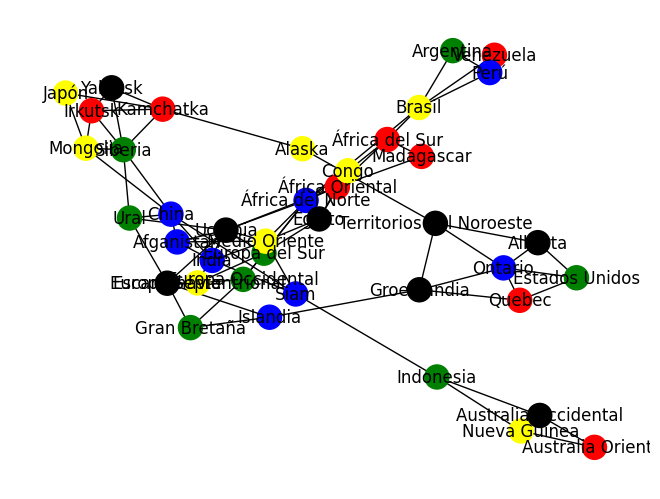

In [31]:
tablero.dibujar_grafo()

Agresivo 1 lanza [5, 3, 2]
Evolucion 1 lanza [3]
Evolucion 1 pierde una tropa en Ucrania
Agresivo 1 ha conquistado Ucrania


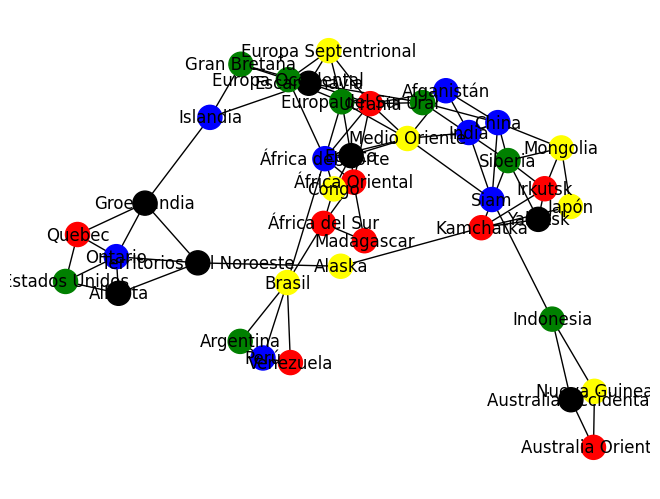

Agresivo Inteligente 1 lanza [6, 4, 4]
JugadorInteligente 1 lanza [1]
JugadorInteligente 1 pierde una tropa en Alaska
Agresivo Inteligente 1 ha conquistado Alaska


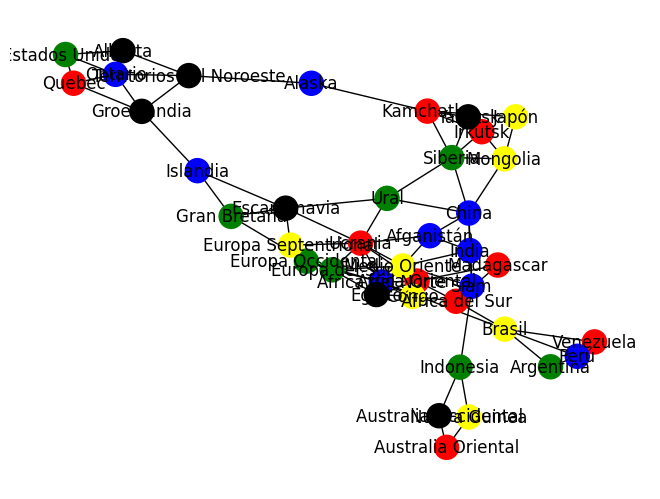

Defensivo 1 lanza [6, 5, 3]
Agresivo 1 lanza [5]
Agresivo 1 pierde una tropa en Ucrania
Defensivo 1 ha conquistado Ucrania


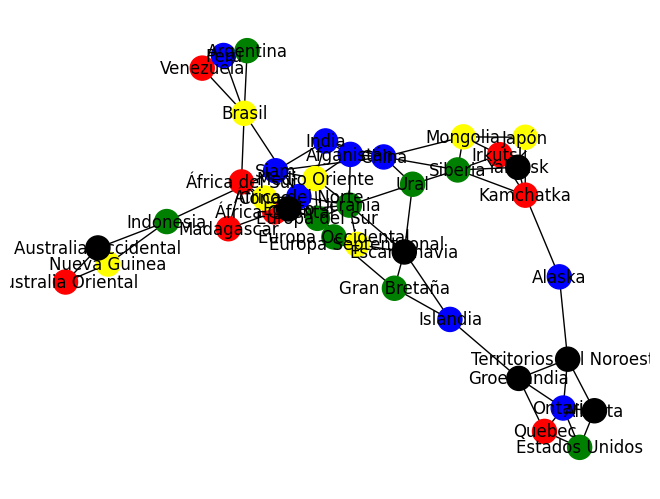

JugadorInteligente 1 lanza [5, 4, 4]
Evolucion 1 lanza [1]
Evolucion 1 pierde una tropa en Egipto
JugadorInteligente 1 ha conquistado Egipto


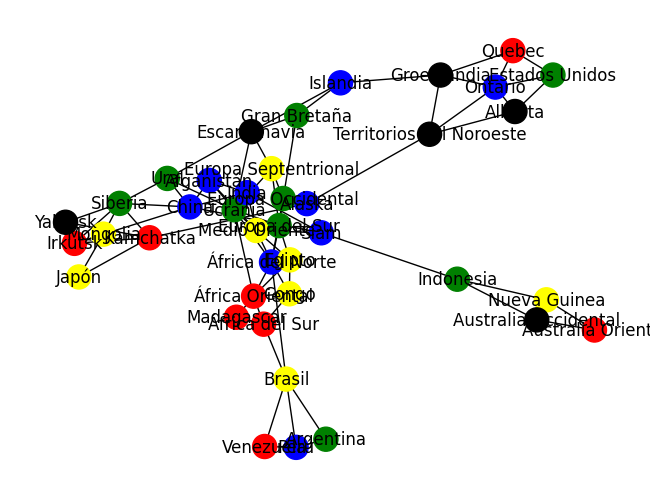

Evolucion 1 lanza [4, 2, 1]
Agresivo Inteligente 1 lanza [4]
Evolucion 1 pierde una tropa en Escandinavia


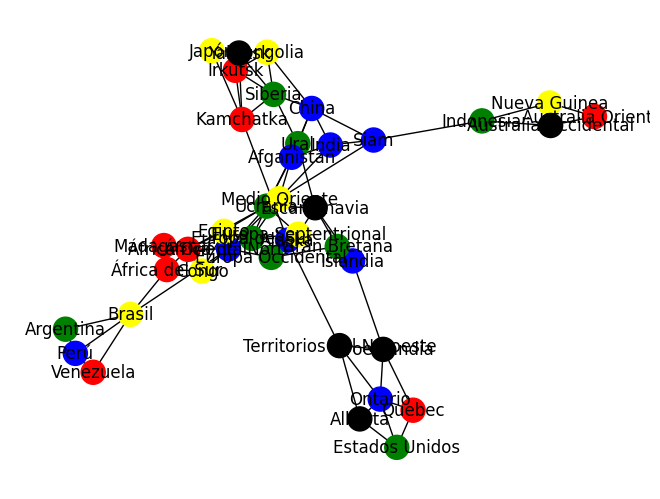

Agresivo 1 lanza [6, 5, 3]
Defensivo 1 lanza [3]
Defensivo 1 pierde una tropa en Ucrania
Agresivo 1 ha conquistado Ucrania


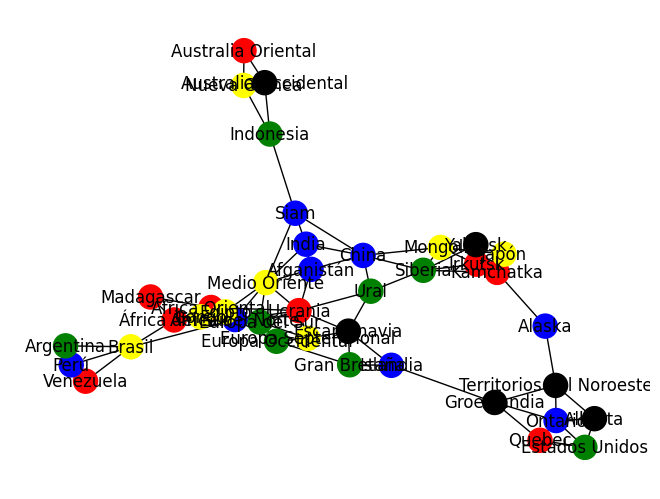

Agresivo Inteligente 1 lanza [5, 4, 1]
Evolucion 1 lanza [5]
Agresivo Inteligente 1 pierde una tropa en África del Norte


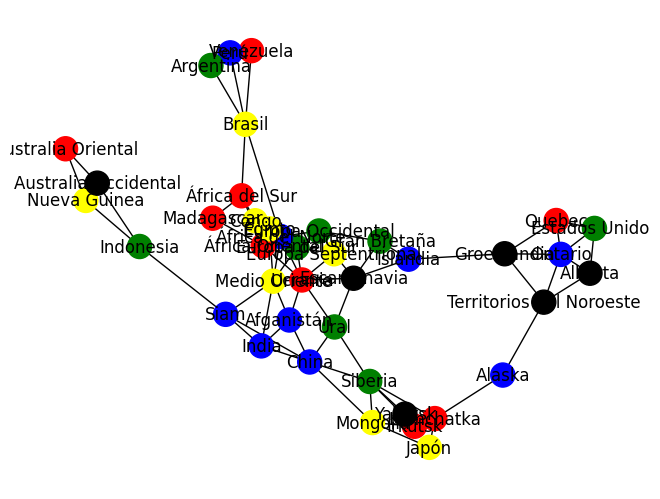

Defensivo 1 lanza [6, 4, 1]
Agresivo Inteligente 1 lanza [5]
Agresivo Inteligente 1 pierde una tropa en Siam
Defensivo 1 ha conquistado Siam


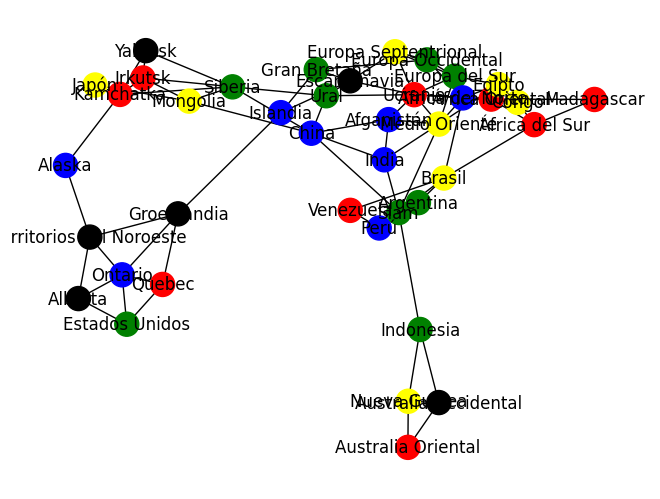

JugadorInteligente 1 lanza [5, 4, 4]
Agresivo 1 lanza [5]
JugadorInteligente 1 pierde una tropa en Congo


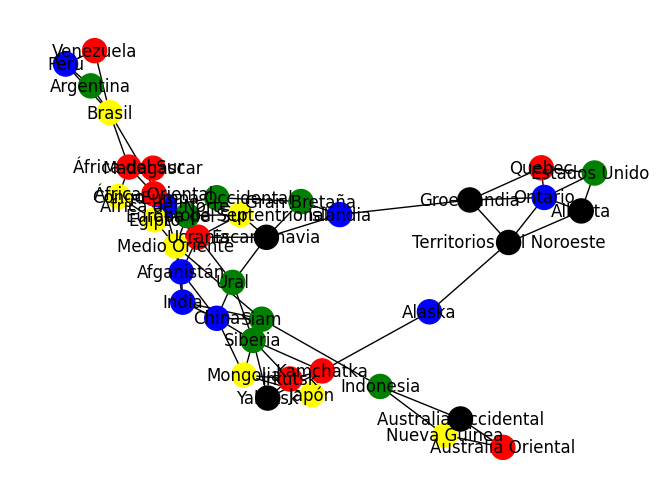

Evolucion 1 lanza [2, 2, 2]
Agresivo Inteligente 1 lanza [4]
Evolucion 1 pierde una tropa en Yakutsk


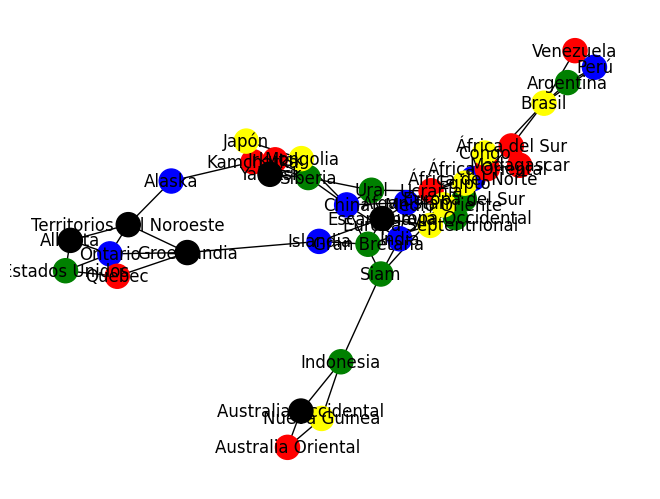

Ningún jugador ha completado su misión.


In [32]:
tablero.jugar(10)

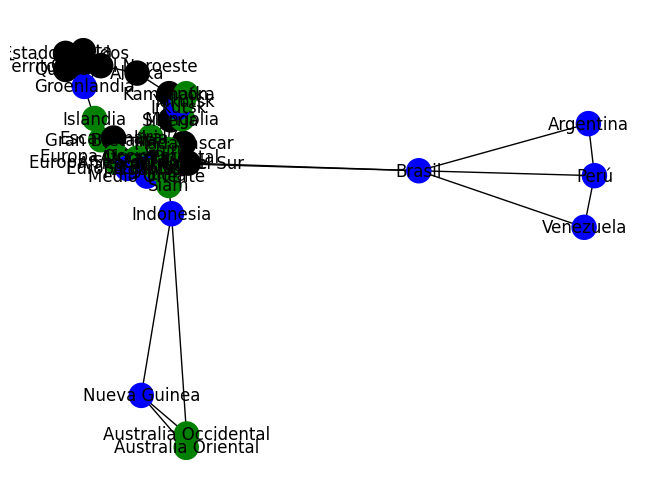

In [15]:
tablero.dibujar_grafo()